# Taller 2 segundo corte

Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

#GRUPO:

# Laura Valentina Rivera
# Santiago Gonzalez Jimenez

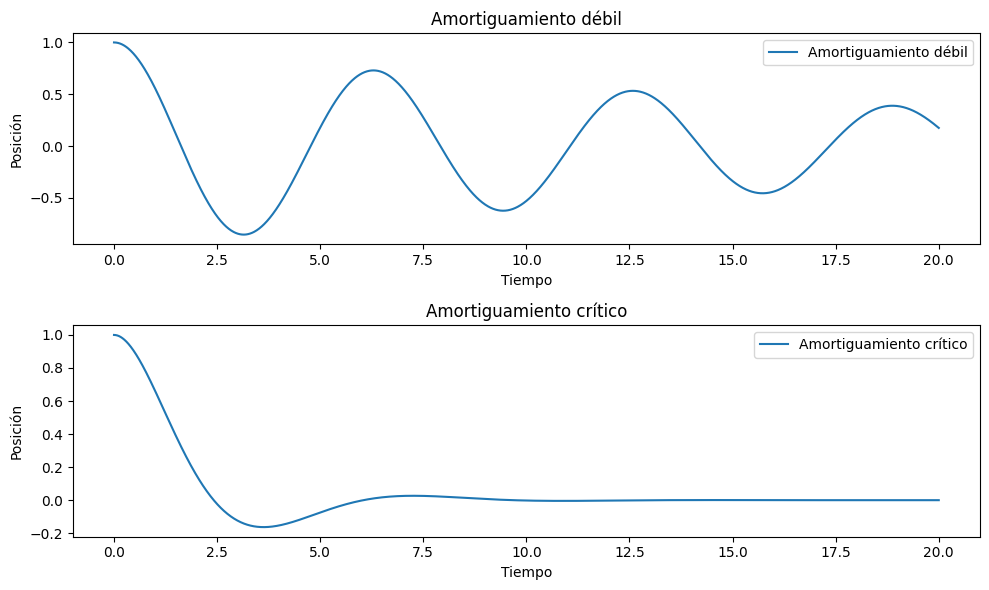

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, x, v, gamma, omega):
    return -gamma * v - omega**2 * x

def runge_kutta(x0, v0, t0, tf, h, gamma, omega):
    n = int((tf - t0) / h)
    t = np.linspace(t0, tf, n + 1)
    x = np.zeros(n + 1)
    v = np.zeros(n + 1)
    x[0] = x0
    v[0] = v0

    for i in range(1, n + 1):
        k1x = h * v[i - 1]
        k1v = h * f(t[i - 1], x[i - 1], v[i - 1], gamma, omega)

        k2x = h * (v[i - 1] + 0.5 * k1v)
        k2v = h * f(t[i - 1] + 0.5 * h, x[i - 1] + 0.5 * k1x, v[i - 1] + 0.5 * k1v, gamma, omega)

        k3x = h * (v[i - 1] + 0.5 * k2v)
        k3v = h * f(t[i - 1] + 0.5 * h, x[i - 1] + 0.5 * k2x, v[i - 1] + 0.5 * k2v, gamma, omega)

        k4x = h * (v[i - 1] + k3v)
        k4v = h * f(t[i - 1] + h, x[i - 1] + k3x, v[i - 1] + k3v, gamma, omega)

        x[i] = x[i - 1] + (1/6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        v[i] = v[i - 1] + (1/6) * (k1v + 2 * k2v + 2 * k3v + k4v)

    return t, x, v

x0 = 1.0
v0 = 0.0

t0 = 0.0
tf = 20.0
h = 0.01
gamma_weak = 0.1
gamma_critical = 1.0
omega = 1.0

t_weak, x_weak, v_weak = runge_kutta(x0, v0, t0, tf, h, gamma_weak, omega)
t_critical, x_critical, v_critical = runge_kutta(x0, v0, t0, tf, h, gamma_critical, omega)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_weak, x_weak, label='Amortiguamiento débil')
plt.title('Amortiguamiento débil')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_critical, x_critical, label='Amortiguamiento crítico')
plt.title('Amortiguamiento crítico')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.tight_layout()
plt.show()

